# Data understanding and visualization
This is a template for the second exercise in Data analysis and knowledge discovery course. The tasks can be done with the following libraries. You can also use other options if you are more familiar with them. 

In [2]:
# Library for loading the data as a data frame and for the first task
import pandas as pd

# Library for plotting the histograms and boxplots
import matplotlib.pyplot as plt

# Library for plotting the scatter plots and heatmaps
import seaborn as sns

# For normalization
from sklearn import preprocessing

# For principal component analysis
from sklearn.decomposition import PCA

In [3]:
# Load the data 
data = pd.read_excel('data/exercise-2-data.xlsx')

# 1. Describe the data
#### a) Calculate a cross table of destination and ship type. How many ship types there are? How many ships there are of each type? How many destinations there are? What is the most common destination? What are the most common destinations for the ship types?

In [4]:
unique_ships = data['Ship_type'].unique() # Gives us the unique ships, we see there's three.
ships = data['Ship_type'] # Get column with ships

# This handy little function returns a map of values and occurence
print(ships.value_counts())


Cargo     67
Tanker    59
Tug        9
Name: Ship_type, dtype: int64


There's three different ship types.

With the following numbers:
Cargo     67
Tanker    59
Tug        9

#### b) Calculate mean, median and standard deviation of speed, COG, gross tonnage, length and breadth for each ship type. Are there some clear differences between the ship types? What can you say about the attribute distributions based on these values?

In [5]:
# Mean + median for all
print(f'Mean: \n\n {data.mean()}')
print(f'Median: \n\n {data.median()}')



Mean: 

 MMSI             3.221586e+08
Speed            1.040771e+01
COG              7.823022e+01
Gross_tonnage    1.325211e+04
Length           1.346299e+02
Breadth          2.015911e+01
dtype: float64
Median: 

 MMSI             2.499970e+08
Speed            1.026310e+01
COG              7.475290e+01
Gross_tonnage    5.075000e+03
Length           1.162600e+02
Breadth          1.686000e+01
dtype: float64


In [6]:

for i in unique_ships:
    specific_data = data[data['Ship_type'] == i]
    print(f'Mean values for {i}: \n{specific_data.mean()}\n\n')
for i in unique_ships:
    specific_data = data[data['Ship_type'] == i]
    print(f'Standard deviation values for {i}: \n{specific_data.std()}\n\n')
for i in unique_ships:
    specific_data = data[data['Ship_type'] == i]
    print(f'Median values for {i}: \n{specific_data.median()}\n\n')

Mean values for Cargo: 
MMSI             3.020602e+08
Speed            9.944228e+00
COG              7.515540e+01
Gross_tonnage    7.216179e+03
Length           1.134824e+02
Breadth          1.684179e+01
dtype: float64


Mean values for Tanker: 
MMSI             3.585505e+08
Speed            1.122283e+01
COG              7.880052e+01
Gross_tonnage    2.209286e+04
Length           1.748246e+02
Breadth          2.570407e+01
dtype: float64


Mean values for Tug: 
MMSI             2.332114e+08
Speed            8.514444e+00
COG              9.738197e+01
Gross_tonnage    2.302222e+02
Length           2.856222e+01
Breadth          8.504444e+00
dtype: float64


Standard deviation values for Cargo: 
MMSI             1.094090e+08
Speed            1.902193e+00
COG              1.359788e+01
Gross_tonnage    9.346956e+03
Length           4.130211e+01
Breadth          5.987596e+00
dtype: float64


Standard deviation values for Tanker: 
MMSI             1.643041e+08
Speed            1.899707e+00
COG 

In general, it seems that the tankers are generally a lot larger than the tugs or cargo ships. Tugs and cargo-ships seem to be about the same speed, where tankers are slightly faster.



# 2. Attribute value distributions
#### a) Plot four histrograms of the speed using the Sturges', Scott's, square root and Freedman-Diaconis' methods to determine the number of bins. How are the numbers of bins calculated? Compare the distributions of different ship types. Is this a feasible attribute for classification?

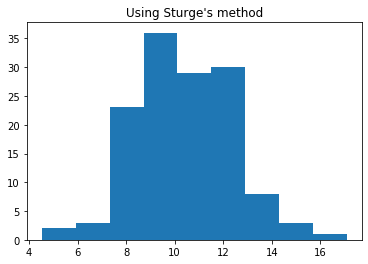

In [7]:
# Sturges
speed_data = data['Speed']

plt.hist(speed_data, bins='sturges')  # arguments are passed to np.histogram
plt.title('Using Sturge\'s method')
plt.show()

### Sturge's

Number of bins based on logarithm value, bad on small numbers.

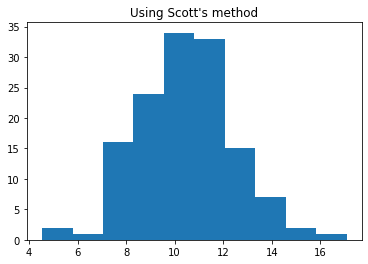

In [8]:
# Scott's
plt.hist(speed_data, bins='scott')  # arguments are passed to np.histogram
plt.title('Using Scott\'s method')
plt.show()

### Scott's

Based on sample standard deviation

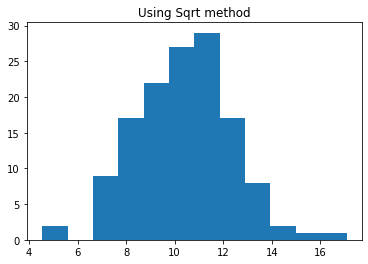

In [9]:
# Sqrt's
plt.hist(speed_data, bins='sqrt')  # arguments are passed to np.histogram
plt.title('Using Sqrt method')
plt.show()

### Sqrt-method

Takes the square root of the number of instances as the bin number.

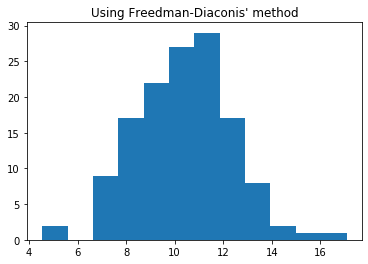

In [10]:
# Freedman-Diaconis'
plt.hist(speed_data, bins='fd')  # arguments are passed to np.histogram
plt.title('Using Freedman-Diaconis\' method')
plt.show()

### Freedman-Diaconis'

Based on IQR, interquartile ranger this is less suspect to outliers

#### b)	Explain what a boxplot is. Plot them for the attributes grouped by the ship type. Are there such outliers that something should be done to them?

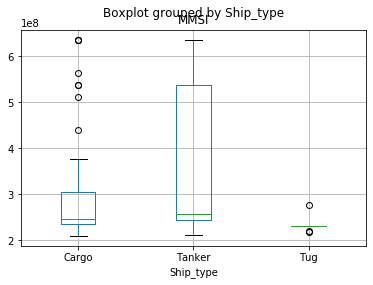

In [55]:
df = pd.DataFrame(data)
boxplot = df.boxplot(by="Ship_type", column="MMSI")


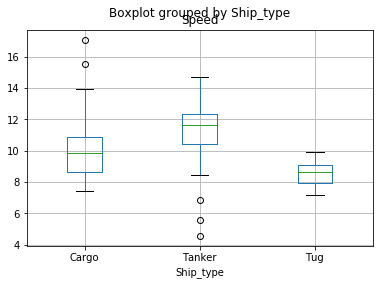

In [56]:
df = pd.DataFrame(data)
boxplot = df.boxplot(by="Ship_type", column="Speed")


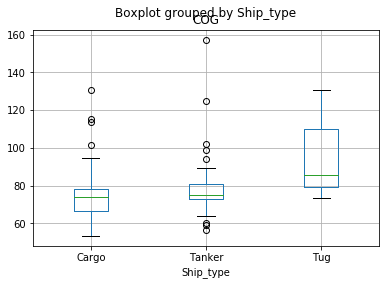

In [57]:
df = pd.DataFrame(data)
boxplot = df.boxplot(by="Ship_type", column="COG")


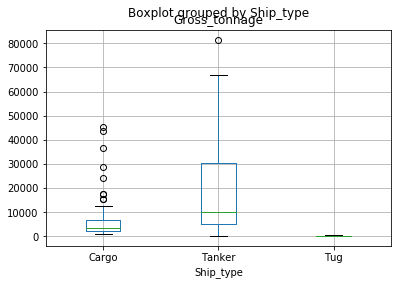

In [58]:
df = pd.DataFrame(data)
boxplot = df.boxplot(by="Ship_type", column="Gross_tonnage")

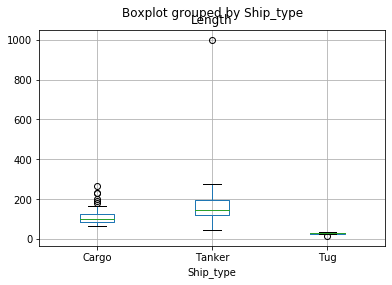

In [59]:
df = pd.DataFrame(data)
boxplot = df.boxplot(by="Ship_type", column="Length")


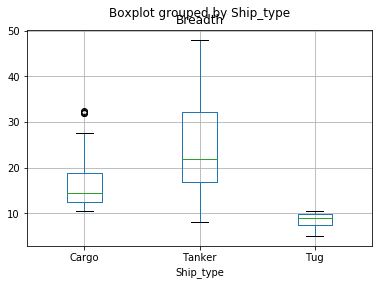

In [60]:
df = pd.DataFrame(data)
boxplot = df.boxplot(by="Ship_type", column="Breadth")


# 3. Relationships between attributes
#### a) Plot pairwise scatter plots of the numerical attributes. What kind of relationships can you see? Can you see any outliers? 

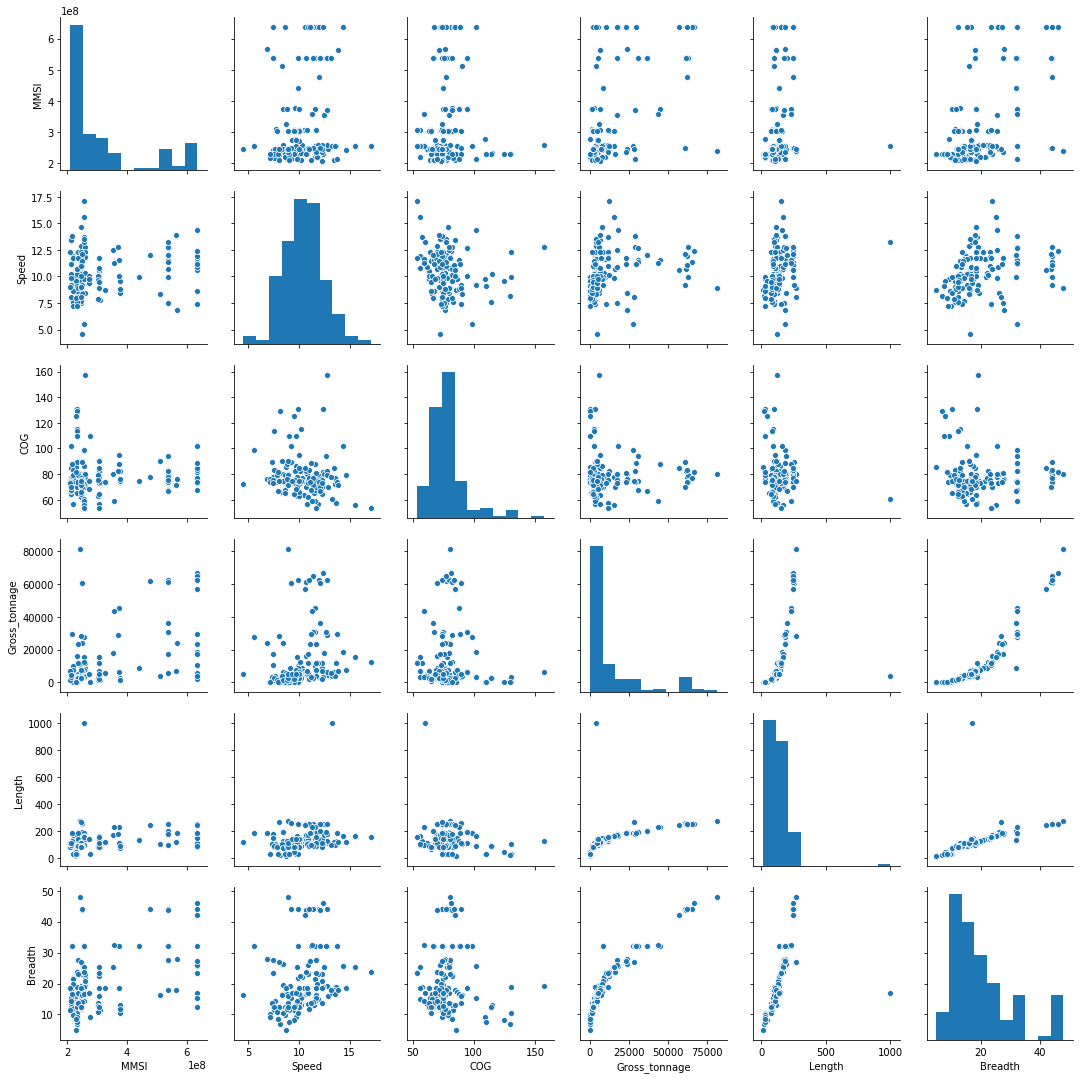

In [62]:
df = pd.DataFrame(data)
sns.pairplot(df)

#### b) What are Pearson's correlation, Spearman's rho and Kendall's tau? Calculate the correlation coefficient matrices. What kind of relationships there are between the attributes? Does the detected outlier affect the correlation? You can use heatmap to visualize the matrices and more easily see the strength of the relationship.

These are three different methods for calculating covariance between features. We can see from the data, that the most obviously recognisable relationship is between the features affecting the size, with the cross tonnage. There seems to be at least a long ship that appears to be an outlier  with regards to the other features.

                   MMSI     Speed       COG  Gross_tonnage    Length   Breadth
MMSI           1.000000  0.139441 -0.018549       0.517869  0.270662  0.549738
Speed          0.139441  1.000000 -0.149721       0.208190  0.272795  0.297126
COG           -0.018549 -0.149721  1.000000      -0.014073 -0.159402 -0.055518
Gross_tonnage  0.517869  0.208190 -0.014073       1.000000  0.517889  0.953737
Length         0.270662  0.272795 -0.159402       0.517889  1.000000  0.563628
Breadth        0.549738  0.297126 -0.055518       0.953737  0.563628  1.000000


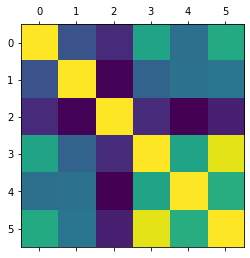

                   MMSI     Speed       COG  Gross_tonnage    Length   Breadth
MMSI           1.000000  0.146474  0.016579       0.459488  0.443161  0.468279
Speed          0.146474  1.000000 -0.196932       0.454907  0.404689  0.458933
COG            0.016579 -0.196932  1.000000       0.031788  0.024575  0.032588
Gross_tonnage  0.459488  0.454907  0.031788       1.000000  0.961197  0.983347
Length         0.443161  0.404689  0.024575       0.961197  1.000000  0.954006
Breadth        0.468279  0.458933  0.032588       0.983347  0.954006  1.000000
                   MMSI     Speed       COG  Gross_tonnage    Length   Breadth
MMSI           1.000000  0.104815  0.002654       0.319080  0.311313  0.328451
Speed          0.104815  1.000000 -0.133002       0.318066  0.283168  0.319106
COG            0.002654 -0.133002  1.000000       0.026220  0.021373  0.022651
Gross_tonnage  0.319080  0.318066  0.026220       1.000000  0.872452  0.911511
Length         0.311313  0.283168  0.021373       0.

In [69]:
pearson = df.corr(method="pearson")
print(pearson)
plt.matshow(pearson)
plt.show()
print(df.corr(method="kendall"))

                   MMSI     Speed       COG  Gross_tonnage    Length   Breadth
MMSI           1.000000  0.104815  0.002654       0.319080  0.311313  0.328451
Speed          0.104815  1.000000 -0.133002       0.318066  0.283168  0.319106
COG            0.002654 -0.133002  1.000000       0.026220  0.021373  0.022651
Gross_tonnage  0.319080  0.318066  0.026220       1.000000  0.872452  0.911511
Length         0.311313  0.283168  0.021373       0.872452  1.000000  0.845690
Breadth        0.328451  0.319106  0.022651       0.911511  0.845690  1.000000


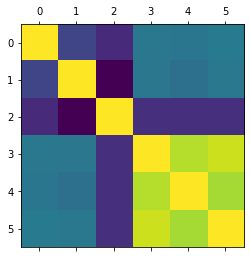

In [70]:
kendall = df.corr(method="kendall")
print(kendall)
plt.matshow(kendall)
plt.show()


                   MMSI     Speed       COG  Gross_tonnage    Length   Breadth
MMSI           1.000000  0.146474  0.016579       0.459488  0.443161  0.468279
Speed          0.146474  1.000000 -0.196932       0.454907  0.404689  0.458933
COG            0.016579 -0.196932  1.000000       0.031788  0.024575  0.032588
Gross_tonnage  0.459488  0.454907  0.031788       1.000000  0.961197  0.983347
Length         0.443161  0.404689  0.024575       0.961197  1.000000  0.954006
Breadth        0.468279  0.458933  0.032588       0.983347  0.954006  1.000000


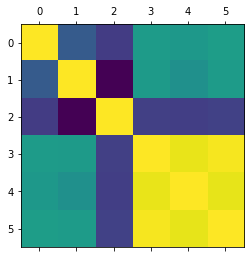

In [71]:
spearman = df.corr(method="spearman")
print(spearman)
plt.matshow(spearman)
plt.show()


# 4. Dimensionality reduction
#### Explain what principal component analysis is. Do that with and without z-score normalization. Visualize the results with a scatter plot by projecting the data to the first two principal components. How much of the variation is explained with the two principal components?

Principal component analysis is the process of reducing the dimensions of a dataset with the means of combining the different dimensions into combined features without affecting the shape of the data too much. In short it creates a projection from a multi-dimensional space to one with less dimensions.

The role of z-score normalization in PCA is to place the scale of the data on an even level to avoid outliers. It basically centers the data around the origo of the two dimensional plot.

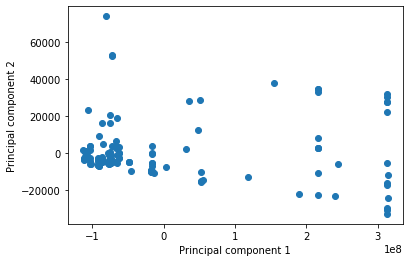

In [97]:
pca = PCA(n_components=2)
numeric_data = data.drop('Ship_type', 1).drop('Destination', 1)

X = pd.DataFrame(numeric_data)

x_new = pca.fit_transform(X)

plt.scatter(x_new[:,0], x_new[:,1])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

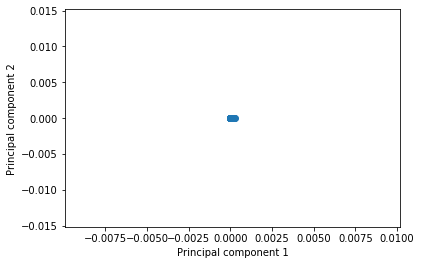

In [104]:
pca = PCA(n_components=2)
numeric_data = data.drop('Ship_type', 1).drop('Destination', 1)

X = pd.DataFrame(numeric_data)
X = preprocessing.normalize(X) # On the second iteration we normalize the data
x_new = pca.fit_transform(X)

plt.scatter(x_new[:,0], x_new[:,1])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

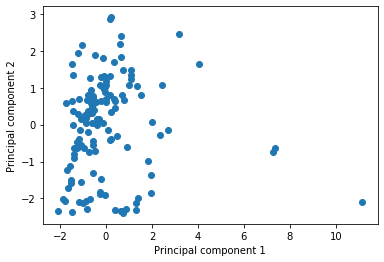

In [106]:
X = preprocessing.scale(X) # We need to scale the results to make things readable.
x_new = pca.fit_transform(X)

plt.scatter(x_new[:,0], x_new[:,1])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()